# Ocean model

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_settings import ps_defaults
ps_defaults(use_tex=False, dpi=150)

$r_E\begin{bmatrix}u_E\\ v_E \end{bmatrix} + f \begin{bmatrix}- v_E\\ u_E \end{bmatrix} = \frac{1}{\rho H^{*}} \begin{bmatrix}- \tau^{x}\\ \tau^{y} \end{bmatrix}$

$\begin{bmatrix}u_{m;\;t}\\ v_{m;\; t} \end{bmatrix} + f \begin{bmatrix}- v_m\\ u_m \end{bmatrix} = -g \begin{bmatrix}- h_{m;\;x}\\ h_{m;\;y} \end{bmatrix}  - r_m \begin{bmatrix} u_m\\ v_m \end{bmatrix}$

$u_{m;\;x} + v_{m;\;y} = - h_{m;\;t} - r_m\cdot h_{m} $

$w_s = H_s\left(u_{s;\;x} + v_{s;\;y}\right)$

$T_{s;\;t} + \begin{bmatrix} u_s\\ v_s \\ w_s \end{bmatrix} \cdot \nabla T_s  + \gamma M(w_{s}) \frac{T_s - T_d}{H_s}  = - \frac{\bar{Q} + Q'}{\rho c_{pw} H_s}$

$\frac{1}{H^{*}}= \frac{1}{H_s} - \frac{1}{D_1} - \frac{1}{D_2}$


 

In [3]:
from src.configs.load_config import load_config
from src.models.model_setup import ModelSetup
from src.constants import TEST_DIREC
from src.models.ocean import Ocean

In [3]:
cfg = load_config()
setup = ModelSetup(str(TEST_DIREC))

{'project': 'seager19', 'user': 'test_user', 'test': True, 'notes': 'test', 'run': True, 'animate': True, 'atmos': True, 'ocean': {'tcom_name': 'tcom', 'tios2cdf_name': 'tios2cdf', 'spin': False, 'diag': False, 'ingrid': False, 'run_through': False}, 'oc': {'nummode': 2, 'boundaries': 'Periodic', 'wind_file': 'tau-ECMWF-clim', 'dq_dtemp_file': 'dQdT-sample.nc', 'dq_df_file': 'dQdf-sample.nc', 'mask_file': 'om_mask.nc', 'time_test': '2 months', 'time_spin': '2 months', 'time_diag': '2 years', 'time_run2f': '58 years'}, 'coup': {'c_d': 0.00225, 'rho_air': 1.225}, 'atm': {'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, 'r': 0.8, 'h_q': 1800, 'wnsp_min': 4, 'rho_00': 0.3, 'pr_max': '20.0 / 3600 / 24', 'relative_humidity': 0.8, 'number_iterations': 50, 'height_tropopause': 15000.0, 'theta_00': 300, 'nbsq': 0.0003, 'radius_earth': 6370000.0, 'pi': 3.141592653589793, 'stefan_boltzman_const': 5.67e-08, 'sec_in_day': 86400, 'gravity': 9.8, 'temp_0_c': 273.15, 'omega_2': '2 * 2 * ${atm.pi} / ${atm.

In [4]:
ocean = Ocean(cfg, setup)
ocean.compile_all()
if cfg.run:
   ocean.run_all()
if cfg.animate:
   ocean.animate_all()

editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_spin
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_diag
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_run2f
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_test 2.03007 s

'run_all'  2.05800 s 

'animate_all'  0.00031 s 



In [13]:
import os
import xarray as xr

In [20]:
xr_da = xr.open_dataset(os.path.join(setup.ocean_data_path, cfg.oc.dq_dtemp_file), decode_times=False)
print(xr_da)

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dQdT     (T, Z, Y, X) float32 ...


In [22]:
xr_da = xr.open_dataset(os.path.join(setup.ocean_data_path, cfg.oc.dq_df_file), decode_times=False)
print(xr_da)

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    dQdf     (T, Z, Y, X) float32 ...


In [23]:
os.listdir(setup.ocean_data_path)

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y']

In [28]:
from src.constants import PROJECT_PATH
setup_old = ModelSetup(str(PROJECT_PATH))
os.listdir(setup_old.ocean_data_path)

['rzk.pro',
 'spline_ECMWF.txt',
 'dQdf-sample.nc',
 'om_mask.nc',
 'qflx.nc',
 'tau-ECMWF.y',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF.x',
 'dQdT-sample.nc',
 'qflx-0.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'qflx-test.nc']

In [29]:
os.listdir(setup_old.ocean_output_path)

['om_spin.20y.restart',
 'om_run2f.nc',
 'om_spin.nc',
 'om_spin.save',
 'om_run2f.save',
 'om_diag.2y.restart',
 'om_diag.nc',
 'om_diag.save',
 'om_run2f_T1.nc',
 'om_spin_T1.nc',
 'om_spin_T2.nc',
 'om_diag_T2.nc',
 'om_run2f_T2.nc',
 'om_spin_T3.nc',
 'om_diag_T3.nc',
 'om_run2f_T3.nc']

In [30]:
os.listdir(setup_old.atmos_tmp_path)

['S91-Hq1800-PrcpLand1.nc',
 'S91-Hq1800-PrcpLand0.nc',
 'S91-hq1800-prcp_land1.nc']

In [31]:
os.listdir(setup_old.atmos_data_path)

['ps-ECMWF-clim.nc',
 'ts-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim60.nc',
 'pr-ECMWF-trend.nc',
 'sst-ECMWF-clim.nc',
 'mask-360x181.nc',
 'ts-ECMWF-clim.nc',
 'mask-360x180.nc',
 'clt-ECMWF-clim60.nc',
 'ts-ECMWF-trend.nc',
 'sst-ECMWF-trend.nc',
 'rh-fixed-clim60.nc',
 'rh-ECMWF-clim60.nc',
 'sfcWind-ECMWF-clim.nc',
 'pr-ECMWF-clim.nc']

In [32]:
os.path.join(setup_old.atmos_data_path, "mask-360x180.nc")

'/home/users/sithom/seager19/atmos/DATA/mask-360x180.nc'

In [35]:
xr_da = xr.open_dataset(
    os.path.join(setup_old.atmos_data_path, "ts-ECMWF-clim.nc"),
    decode_times=False,
)
print(xr_da)

<xarray.Dataset>
Dimensions:  (X: 360, Y: 181)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    ts       (Y, X) float32 ...


In [37]:
xr_da = xr.open_dataset(
    os.path.join(setup_old.atmos_data_path, "sfcWind-ECMWF-clim.nc"),
    decode_times=False,
)
print(xr_da)

<xarray.Dataset>
Dimensions:  (X: 360, Y: 181)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    sfcWind  (Y, X) float64 ...


<xarray.DataArray 'STRESS_TAUX' (T_01: 241, L_01: 1, Y_01: 360, X_01: 161)>
[13968360 values with dtype=float32]
Coordinates:
  * X_01     (X_01) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * Y_01     (Y_01) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * L_01     (L_01) float32 1.0
  * T_01     (T_01) float32 -264.0 -263.1 -262.1 -261.1 ... -26.08 -25.08 -24.08
Attributes:
    long_name:  TAUX


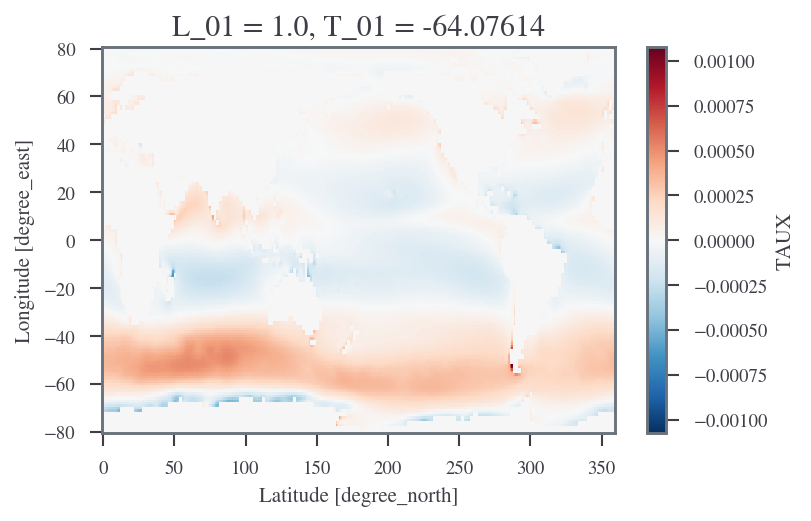

In [51]:
xr_da = xr.open_dataset(
    os.path.join(setup_old.ocean_output_path, "om_spin.nc"),
    decode_times=False,
)
print(xr_da.STRESS_TAUX)
xr_da.STRESS_TAUX.isel(T_01=200, L_01=0).plot(y="X_01", x="Y_01")

In [44]:
xr_da = xr.open_dataset(
    os.path.join(setup_old.ocean_output_path, "om_diag.nc"),
    decode_times=False,
)
print(xr_da)

<xarray.Dataset>
Dimensions:       (GRID: 1, L_01: 1, L_02: 1, L_03: 1, T_01: 25, T_02: 25, T_03: 25, X_01: 360, X_02: 360, X_03: 360, Y_01: 161, Y_02: 161, Y_03: 161)
Coordinates: (12/13)
  * GRID          (GRID) float32 0.0
  * X_01          (X_01) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_01          (Y_01) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_01          (L_01) float32 1.0
  * T_01          (T_01) float32 -48.02 -47.08 -46.09 ... -26.08 -25.09 -24.08
  * X_02          (X_02) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    ...            ...
  * L_02          (L_02) float32 0.0
  * T_02          (T_02) float32 -48.02 -47.08 -46.09 ... -26.08 -25.09 -24.08
  * X_03          (X_03) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_03          (Y_03) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_03          (L_03) float32 1.0
  * T_03          (T_03) float32 -48.02 -47.08 -46.09 ... -26.08 -25.09 -24.0

In [52]:
xr_da = xr.open_dataset(
    os.path.join(os.path.join(setup_old.ocean_output_path, "om_run2f.nc")),
    decode_times=False,
)
print(xr_da)

<xarray.Dataset>
Dimensions:       (GRID: 1, L_01: 1, L_02: 1, L_03: 1, T_01: 697, T_02: 697, T_03: 697, X_01: 360, X_02: 360, X_03: 360, Y_01: 161, Y_02: 161, Y_03: 161)
Coordinates: (12/13)
  * GRID          (GRID) float32 0.0
  * X_01          (X_01) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_01          (Y_01) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_01          (L_01) float32 0.0
  * T_01          (T_01) float32 -24.02 -23.08 -22.09 ... 669.9 670.9 671.9
  * X_02          (X_02) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    ...            ...
  * L_02          (L_02) float32 1.0
  * T_02          (T_02) float32 -24.02 -23.08 -22.09 ... 669.9 670.9 671.9
  * X_03          (X_03) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_03          (Y_03) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_03          (L_03) float32 1.0
  * T_03          (T_03) float32 -24.02 -23.08 -22.09 ... 669.9 670.9 671.9
Data

## Varying ocean model

In [7]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from src.constants import DATA_PATH

In [41]:
pd_obj = pd.read_csv(os.path.join(DATA_PATH, "nummode.csv"))
counter = 0
nummode_l = list()
time_l = list()
for i in pd_obj:
    if "MIN" not in i and "MAX" not in i and "nummode" in i:
        print(i)
        print(10 - counter)
        counter += 1
        print(pd_obj[i].values[0])
        time_l.append(pd_obj[i].values[0])
        nummode_l.append(11-counter)

nummode_10_uncoupled_test - ocean_run
10
5147.776633918984
nummode_9_uncoupled_test - ocean_run
9
4525.170610727044
nummode_8_uncoupled_test - ocean_run
8
3929.120938214997
nummode_7_uncoupled_test - ocean_run
7
3444.572780891001
nummode_6_uncoupled_test - ocean_run
6
3468.7198799189937
nummode_5_uncoupled_test - ocean_run
5
3071.88644934402
nummode_4_uncoupled_test - ocean_run
4
2641.4500270090066
nummode_3_uncoupled_test - ocean_run
3
2098.2206076779985
nummode_2_uncoupled_test - ocean_run
2
1640.786252616992
nummode_1_uncoupled_test - ocean_run
1
1225.6663067650225


Text(0, 0.5, 'Time taken to run om_run2f (s)')

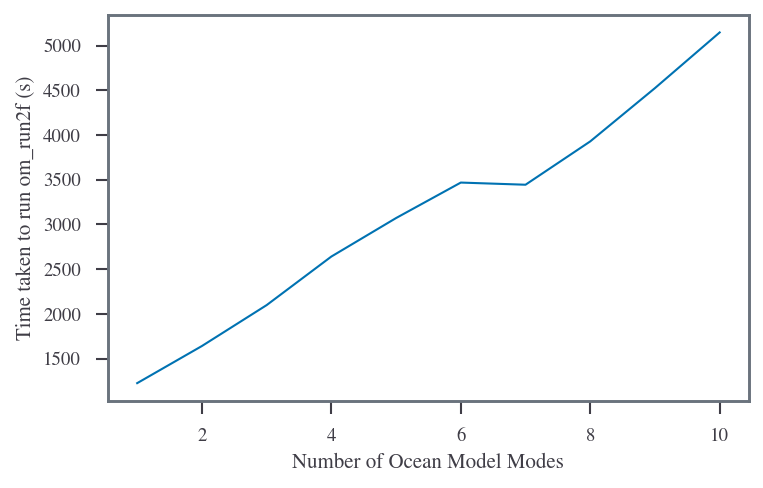

In [42]:
plt.plot(nummode_l, time_l) #, "x", markersize=2, color="red", alpha=1)
plt.xlabel("Number of Ocean Model Modes")
plt.ylabel("Time taken to run om_run2f (s)")